# **Fisher's Iris Dataset**

***

![Iris](https://camo.githubusercontent.com/e7323e044d6625c91a344232b5f5da9127e16e640974fdfd33a52f85fc7dbb2c/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f6173736574732e6461746163616d702e636f6d2f626c6f675f6173736574732f4d616368696e652b4c6561726e696e672b522f697269732d6d616368696e656c6561726e696e672e706e67)

This notebook contains my analysis of the Fisher's Iris dataset.

The data set is available [here](https://archive.ics.uci.edu/dataset/53/iris) 

**Author: Brianne McGrath**

***

# **Dataset Overview**

***

The Fisher's Iris Dataset is a well-known dataset in the field of machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher. The dataset contains measurements of various characteristics of three species of flowers: Setoda, Versicolor and Virginica. 

The four features measured for each sample are: 

- Sepal Length (CM)
- Sepal Width (CM)
- Petal Length (CM)
- Petal Width (CM)

Each species contains 50 samples, with a total of 150 samples in the dataset. The main objective of using this dataset is typically to classify iris flowers into one of the three species based on their feature measurements. 

# **Imports** 

***

We use pandas for the DataFrame data structure. We use matplotlib and seaborn for data visualistation. 

In [121]:
#Importing Necessary Libararies
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

***

# **Load Data**

***

Load the Fisher's Iris dataset. 

In [122]:
df = pd.read_csv('iris.data')

***

# **Inspection of Data**

***

Inital inspection of dataset. 

In [123]:
#Reviewing Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
#Spot Checking Data
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,5.4,3.7,1.5,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
110,6.5,3.2,5.1,2.0,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica


In [125]:
#Showing Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
#Showing Summary Statistics
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
#Are There Any Columns That Have Missing Values?
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [128]:
#Count the Number of Flowers in Each Species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

***

# **Analysis:**

***

# **Summary of Each Variable**

***

In [129]:
#Summary of Each Variable - Single Text File: 

#Calculating summary statistics for each variable
summary = df.describe()

#Format the summary information
summary_text = summary.to_string()

#Write the summary to a text file
with open("variable_summary.txt", "w") as file:
    file.write(summary_text)
print("Summary of variables written to 'variable_summary.txt' file.")

Summary of variables written to 'variable_summary.txt' file.


# **Histogram of Each Variable**

***

In [130]:
#Histogram Trial Pt 2: 

##SUCCESS!! - Add colours to match rest of project at a later date :) 

#Defining the output folder for histograms
output_folder = 'histograms'

def save_histograms(df, output_folder):

    #Defining colours for each Histogram
    colours = ['mediumaquamarine', 'pink', 'lightblue', 'mediumorchid']

    #Loop through each column in the dataset
    for column in df.columns: 
        #Create a histogram for the varibale and save it is a PNG file
        df[column].plot(kind='hist', bins=10, color=colours[i % len(colours)]) #Not showing in the folder? REVIEW!!
        plt.title(f'Histograms of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True) #Not showing either?
        plt.savefig(f'{output_folder}/{column}_histogram.png')
        plt.close()


# **Pairplot**

***

In [1]:
#sns.pairplot(df, hue='Species', palette='pastel')
#plt.grid(True) #No grid? 
#plt.show()

# **Scatter Plots**

***

#### Sepal Width vs Sepal Length:

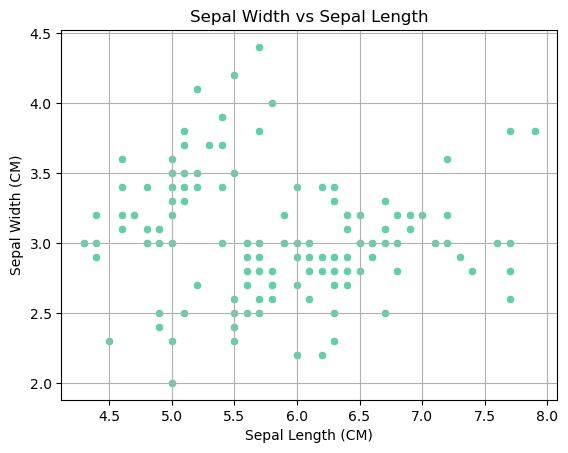

In [131]:
#Scatter Plots 

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, color='mediumaquamarine')
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.grid()
plt.show()
        

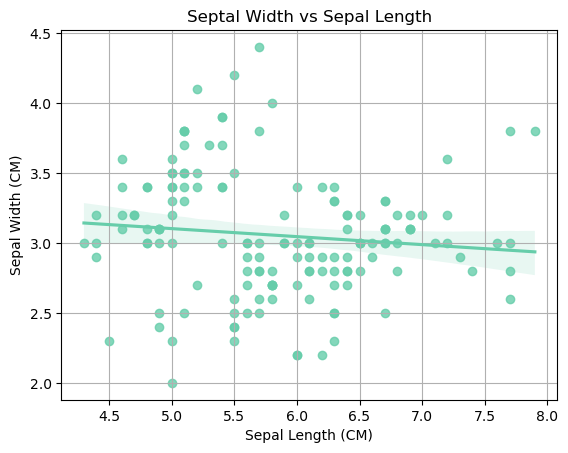

In [132]:
#Adding Regression Line

sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=df, color='mediumaquamarine')
plt.title('Septal Width vs Sepal Length')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.grid()
plt.show()

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


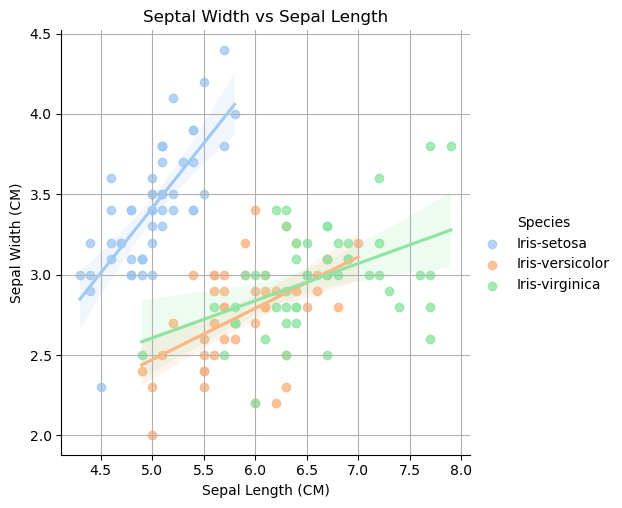

In [133]:
# lmplot seperated by Species

sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', palette='pastel')
plt.title('Septal Width vs Sepal Length')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.grid()
plt.show()

##### Petal Width vs Petal Length

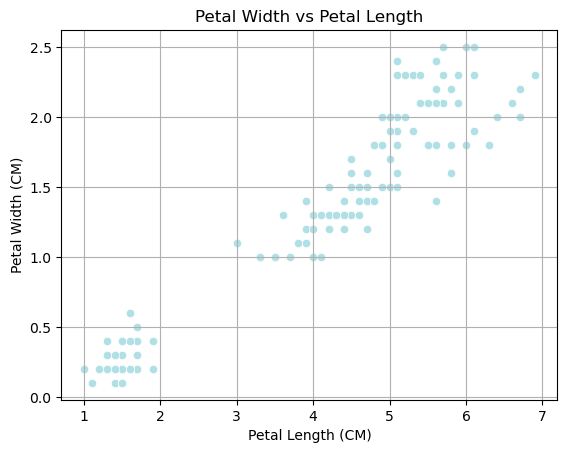

In [134]:
#Scatter Plots 

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, color='powderblue')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()

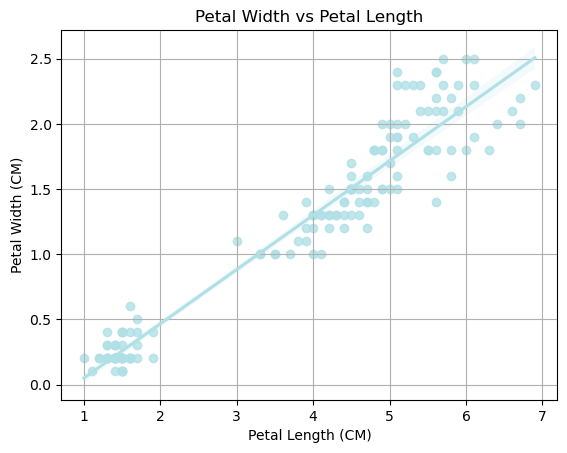

In [135]:
# Adding Regression Line

sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=df, color='powderblue')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


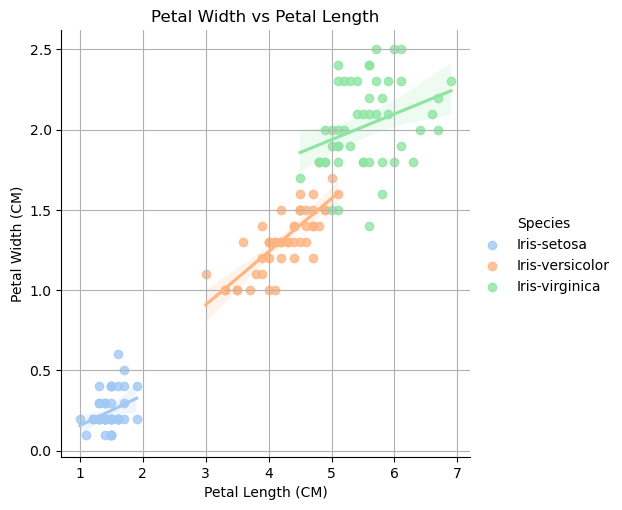

In [136]:
# lmplot seperated by Species

#Scatter Plots 

sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', palette='pastel')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.grid()
plt.show()